     Assay  Sample1  Sample2  Sample3  Sample4  Sample5
0    HMWS%     1.36     0.96     0.76     1.06     0.86
1  Potency    94.20    98.20   105.20   102.20   100.20
   Sample1  Sample2  Sample3  Sample4  Sample5
0     1.36     0.96     0.76     1.06     0.86
1    94.20    98.20   105.20   102.20   100.20
         %HMWS  Potency
Sample1   1.36     94.2
Sample2   0.96     98.2
Sample3   0.76    105.2


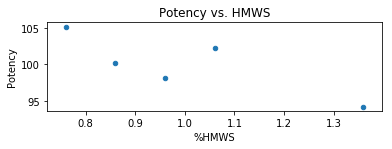

In [41]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv("ExampleData1.csv")

print(df.head(8))

df.drop("Assay", axis=1, inplace=True)

print(df.head(3))

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Potency')
ax1.set_xlabel('%HMWS')
ax1.set_title('Potency vs. HMWS')

dfPlot = df.T
dfPlot.columns = ['%HMWS', 'Potency'] 
print(dfPlot.head(3))

dfPlot.plot(kind = 'scatter', x=0, y=1, ax=ax1)

# df.T.plot(kind='scatter', x=0, y=1)

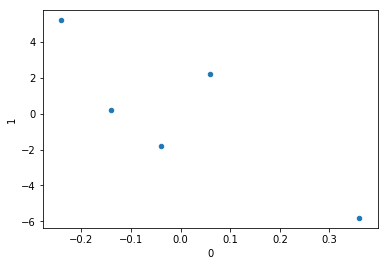

In [20]:
#Subtract the row mean value from each value in each row
df2 = df.sub(df.mean(axis=1), axis=0)

df2.head(3)

df2.T.plot(kind='scatter', x=0, y=1)

In [24]:
A = df2.values
A

array([[ 0.36, -0.04, -0.24,  0.06, -0.14],
       [-5.8 , -1.8 ,  5.2 ,  2.2 ,  0.2 ]])

In [50]:
import numpy as np
from math import sqrt
from scipy.linalg import svd


# A = np.matrix([[0.36, -0.04, -0.24, 0.06, -0.14],
#                [5.8, 1.8, -5.2, -2.2, -0.2]])

# A_length = int(A.shape[1])

# AAT = np.dot(A,A.T)/(A_length-1)

A_Length = int(df2.shape[1])
AAT = np.dot(df2, df2.T)/(A_Length-1)

print('A * Atranspose gives the Covariance Matrix')
print(AAT, '\n')

eigenvalues, eigenvectors = np.linalg.eig(AAT)

e1, e2 = eigenvalues
print('eigenvalue 1: ', e1)
print('eigenvalue 2: ', e2, '\n')

print('eigenvalues')
print (eigenvalues, '\n')
print('eigenvectors')
print (eigenvectors, '\n')

print('SVD')

# SVD
U, s, VT = svd(AAT)
print('Matrix U')
print(U, '\n')
print('Sigma')
print(s, '\n')
print('Matrix V transpose')
print(VT)

A * Atranspose gives the Covariance Matrix
[[ 0.053 -0.79 ]
 [-0.79  17.2  ]] 

eigenvalue 1:  0.016679894446109955
eigenvalue 2:  17.23632010555389 

eigenvalues
[1.66798944e-02 1.72363201e+01] 

eigenvectors
[[-0.99894483  0.04592631]
 [-0.04592631 -0.99894483]] 

SVD
Matrix U
[[-0.04592631  0.99894483]
 [ 0.99894483  0.04592631]] 

Sigma
[1.72363201e+01 1.66798944e-02] 

Matrix V transpose
[[-0.04592631  0.99894483]
 [ 0.99894483  0.04592631]]


In [42]:
#Manual calculation of Variances and Covariances

import pandas as pd
import numpy as np
from math import sqrt

from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline

m = np.array([0.36, -0.04, -0.24, 0.06, -0.14])

#m_mag = sqrt(0.36**2 + 0.04**2 + 0.24**2 + 0.06**2 + 0.14**2)
#mN = m/m_mag

n = np.array([5.8, 1.8, -5.2, -2.2, -0.2])

#n_mag = sqrt(5.8**2 + 1.8**2 + 5.2**2 + 2.2**2 + 0.2*2)
#nN = n/n_mag


v = np.dot(m,n.T)

var_m = np.dot(m,m.T)/(len(n)-1)

var_n = np.dot(n,n.T)/(len(n)-1)

covar = v/(len(n)-1)

print (covar)
print(var_m)
print(var_n)

# need to normalize to length 1


#eigenvalues, eigenvectors = np.linalg.eig(m)
#print (eigenvalues)
#print (eigenvectors)

0.79
0.053
17.200000000000003


In [ ]:


df.sub(df.mean(axis=1), axis=0)